In [1]:
# This is a solution for
# Kaggle challenge: Boston Housing project
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

In [3]:
training_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
submission_example=pd.read_csv("submission_example.csv")

In [4]:
training_data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


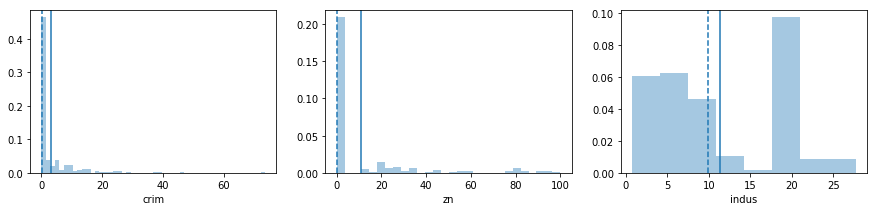

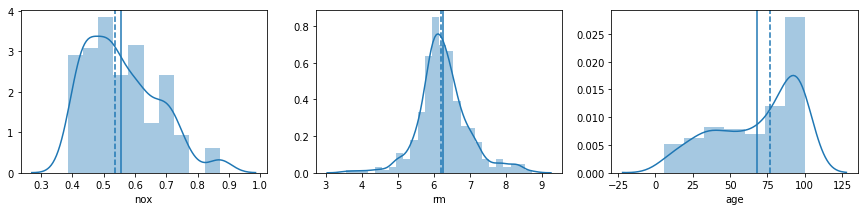

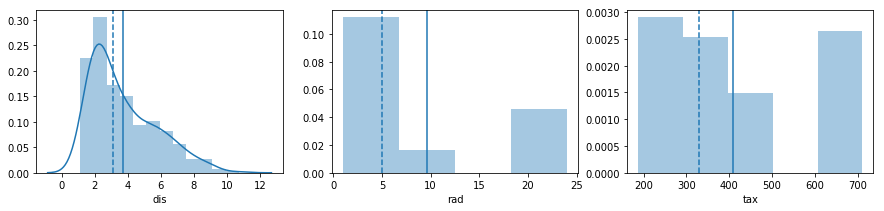

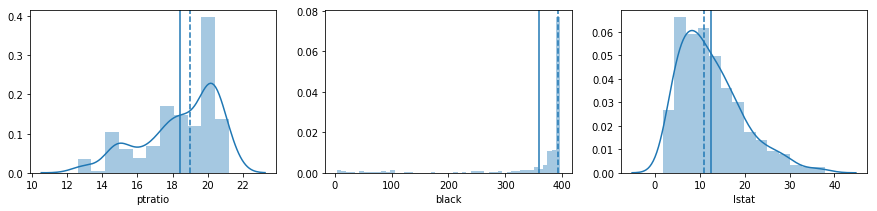

In [5]:
#Basic statistics by looking at the histograms for all input variables
fig, axs=plt.subplots(ncols=3, figsize=(15,3))

plt.figure(1)

for i, var in enumerate(['crim','zn','indus']):
    plt.subplot(131 + i)
    sns.distplot(training_data[var],kde=False,norm_hist=True)
    plt.axvline(training_data[var].mean(),linestyle='solid')
    plt.axvline(training_data[var].median(),linestyle='dashed')

fig, axs=plt.subplots(ncols=3, figsize=(15,3))

plt.figure(2)

for i, var in enumerate(['nox','rm','age']):
    plt.subplot(131 + i)
    sns.distplot(training_data[var])
    plt.axvline(training_data[var].mean(),linestyle='solid')
    plt.axvline(training_data[var].median(),linestyle='dashed')

fig, axs=plt.subplots(ncols=3, figsize=(15,3))

plt.figure(3)

for i, var in enumerate(['dis','rad','tax']):
    plt.subplot(131 + i)
    if i==0:
        sns.distplot(training_data[var])
    else:
        sns.distplot(training_data[var],kde=False,norm_hist=True)
    plt.axvline(training_data[var].mean(),linestyle='solid')
    plt.axvline(training_data[var].median(),linestyle='dashed')

fig, axs=plt.subplots(ncols=3, figsize=(15,3))

plt.figure(4)

for i, var in enumerate(['ptratio','black','lstat']):
    plt.subplot(131 + i)
    if i==1:
        sns.distplot(training_data[var],kde=False,norm_hist=True)
    else:
        sns.distplot(training_data[var])
    plt.axvline(training_data[var].mean(),linestyle='solid')
    plt.axvline(training_data[var].median(),linestyle='dashed')

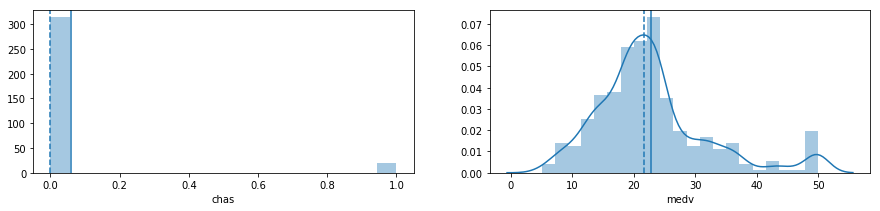

In [6]:
fig, axs=plt.subplots(ncols=2, figsize=(15,3))

plt.figure(1)

for i, var in enumerate(['chas','medv']):
    plt.subplot(121 + i)
    if i==0:
        sns.distplot(training_data[var],kde=False)
    else:
        sns.distplot(training_data[var],kde=True)
    plt.axvline(training_data[var].mean(),linestyle='solid')
    plt.axvline(training_data[var].median(),linestyle='dashed')

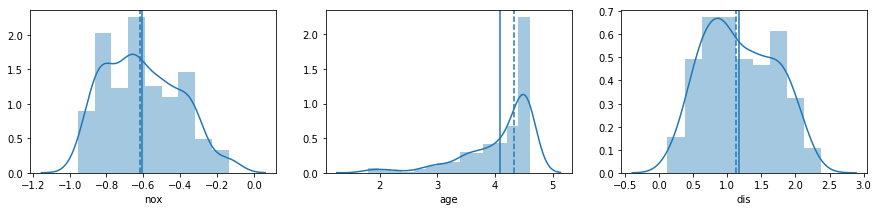

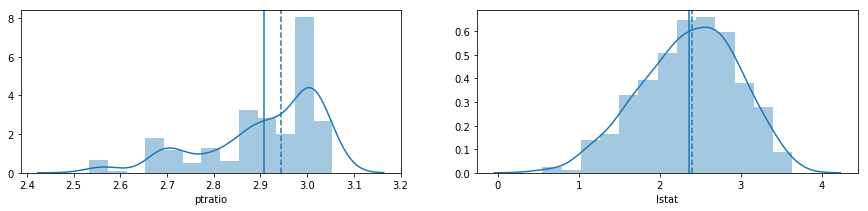

In [7]:
# The above distribution show that 'rm' is mostly normally distributed
# other than that 'nox', 'age', 'dis', 'pratio', 'lstat' are slightly skewed
# rest of them are highly skewed 
#the resulting medv distribution is also almost normally distributed 
# To check for imporvement we can plot the log distribution of the variables
fig, axs=plt.subplots(ncols=3, figsize=(15,3))

plt.figure(1)

for i, var in enumerate(['nox','age','dis']):
    plt.subplot(131 + i)
    sns.distplot(np.log(training_data[var]))
    plt.axvline(np.log(training_data[var]).mean(),linestyle='solid')
    plt.axvline(np.log(training_data[var]).median(),linestyle='dashed')

fig, axs=plt.subplots(ncols=2, figsize=(15,3))

plt.figure(2)

for i, var in enumerate(['ptratio','lstat']):
    plt.subplot(121 + i)
    sns.distplot(np.log(training_data[var]))
    plt.axvline(np.log(training_data[var]).mean(),linestyle='solid')
    plt.axvline(np.log(training_data[var]).median(),linestyle='dashed')

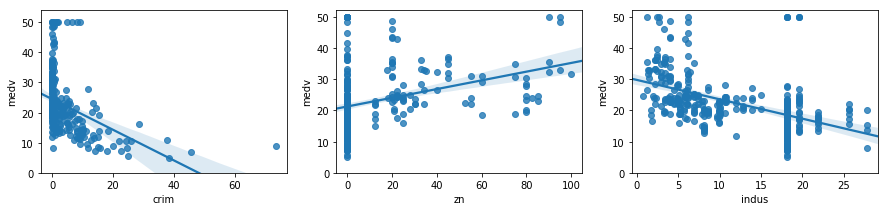

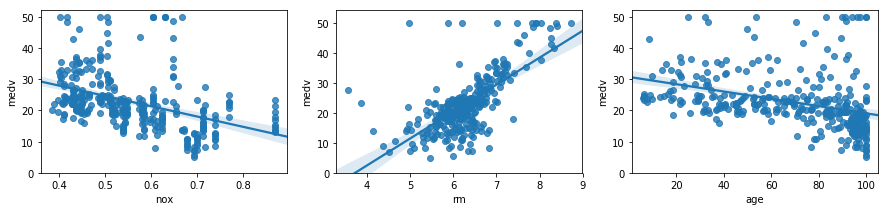

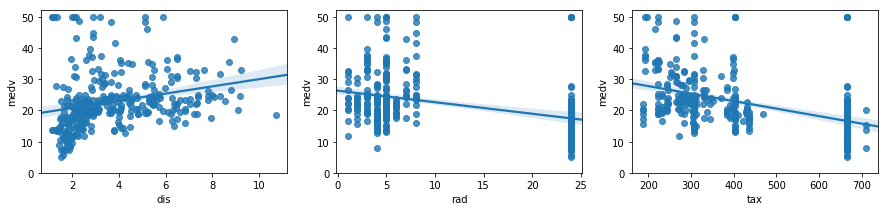

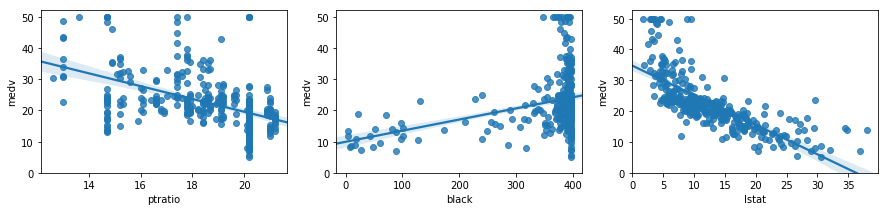

In [8]:
# Scatter plots to get idea about correlations
fig, axs=plt.subplots(ncols=3, figsize=(15,3))

plt.figure(1)

for i, var in enumerate(['crim','zn','indus']):
    plt.subplot(131 + i)
    lm=sns.regplot(training_data[var],training_data['medv'])
    lm.set(ylim=(0,None))

fig, axs=plt.subplots(ncols=3, figsize=(15,3))

plt.figure(2)

for i, var in enumerate(['nox','rm','age']):
    plt.subplot(131 + i)
    lm=sns.regplot(training_data[var],training_data['medv'])
    lm.set(ylim=(0,None))

fig, axs=plt.subplots(ncols=3, figsize=(15,3))

plt.figure(3)

for i, var in enumerate(['dis','rad','tax']):
    plt.subplot(131 + i)
    lm=sns.regplot(training_data[var],training_data['medv'])
    lm.set(ylim=(0,None))

fig, axs=plt.subplots(ncols=3, figsize=(15,3))

plt.figure(4)

for i, var in enumerate(['ptratio','black','lstat']):
    plt.subplot(131 + i)
    lm=sns.regplot(training_data[var],training_data['medv'])
    lm.set(ylim=(0,None))

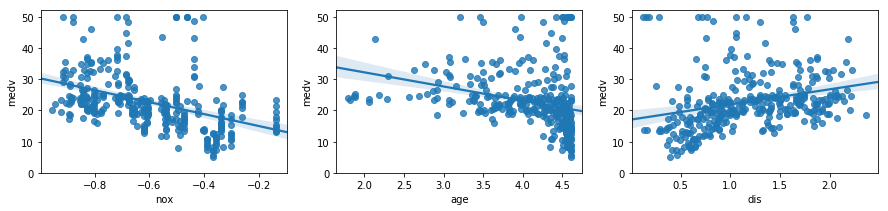

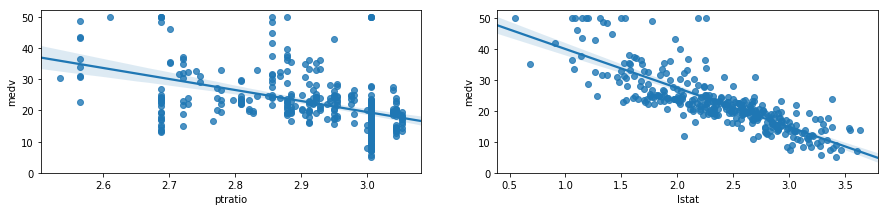

In [9]:
# for the log-distributions scatter-plot
fig, axs=plt.subplots(ncols=3, figsize=(15,3))

plt.figure(1)

for i, var in enumerate(['nox','age','dis']):
    plt.subplot(131 + i)
    lm=sns.regplot(np.log(training_data[var]),training_data['medv'])
    lm.set(ylim=(0,None))


fig, axs=plt.subplots(ncols=2, figsize=(15,3))

plt.figure(2)

for i, var in enumerate(['ptratio','lstat']):
    plt.subplot(121 + i)
    lm=sns.regplot(np.log(training_data[var]),training_data['medv'])
    lm.set(ylim=(0,None))


In [10]:
Filtered_training_data1=training_data
Filtered_training_data1['log-lstat']=np.log(training_data['lstat'])
Filtered_training_data1=Filtered_training_data1.drop(['lstat'],axis=1)
Filtered_test_data1=test_data
Filtered_test_data1['log-lstat']=np.log(test_data['lstat'])
Filtered_test_data1=Filtered_test_data1.drop(['lstat'],axis=1)

In [11]:
Filtered_training_data2=Filtered_training_data1[['ID','rm','log-lstat','medv']]
Filtered_test_data2=Filtered_test_data1[['ID','rm','log-lstat']]

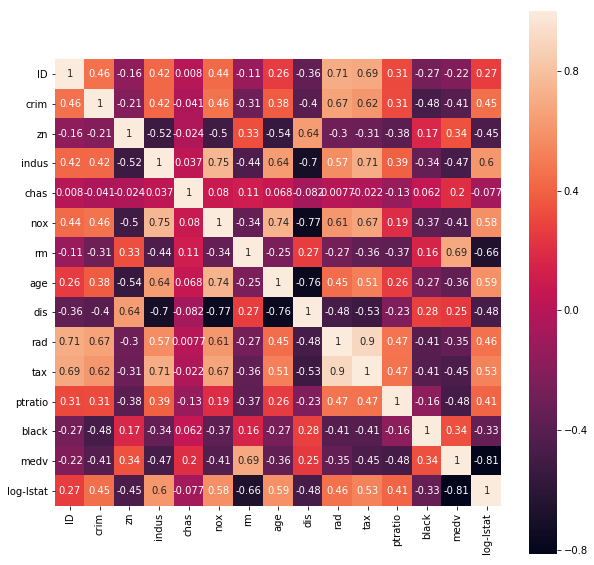

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(Filtered_training_data1.corr(), square=True,annot=True)

In [13]:
Final_training=training_data.drop('ID',axis=1)
X_train1=Final_training.drop(['medv'],axis=1)
Y_train1=Final_training['medv']
X_test1=test_data.drop(['ID'],axis=1).copy()

In [14]:
Final_training1=Filtered_training_data1.drop('ID',axis=1)
X_train2=Final_training1.drop(['medv'],axis=1)
Y_train2=Final_training1['medv']
X_test2=Filtered_test_data1.drop(['ID'],axis=1).copy()

In [15]:
lm=LinearRegression()
lm.fit(X_train1,Y_train1)
Y_pred1=lm.predict(X_test1)

In [16]:
mse = np.sqrt(mean_squared_error(submission_example['medv'], Y_pred1))
print(mse)

8.3858500242


In [18]:
lm=LinearRegression()
lm.fit(X_train2,Y_train2)
Y_pred2=lm.predict(X_test2)

In [19]:
mse2 = np.sqrt(mean_squared_error(submission_example['medv'], Y_pred2))
print(mse2)

8.36630557143


In [21]:
Final_training2=Filtered_training_data2.drop('ID',axis=1)
X_train3=Final_training2.drop(['medv'],axis=1)
Y_train3=Final_training2['medv']
X_test3=Filtered_test_data2.drop(['ID'],axis=1).copy()
lm=LinearRegression()
lm.fit(X_train3,Y_train3)
Y_pred3=lm.predict(X_test3)
mse3 = np.sqrt(mean_squared_error(submission_example['medv'], Y_pred3))
print(mse3)

7.87214027614


In [22]:
submission = pd.DataFrame({
        "ID": test_data["ID"],
        "medv": Y_pred3
    })
path = ("submissions.csv")

submission.to_csv(path, index=False)